### 1: The logistic map and chaos

Read sections 6.1 and 6.2 in Gould and then do Gould problem 6.1. **Graduate students only:** Reproduce Gould Fig. 6.2.

(a) Explore the dynamical behavior of the logistic map in (6.5) with r = 0.24 for different values of x0 . Show numerically that x = 0 is a stable fixed point for this value of r. That is, the iterated values of x converge to x = 0 independently of the value of x0 . If x represents the population of insects, describe the qualitative behavior of the population.

xn+1 = f (xn) = 4rxn(1 − xn).
 (6.5)

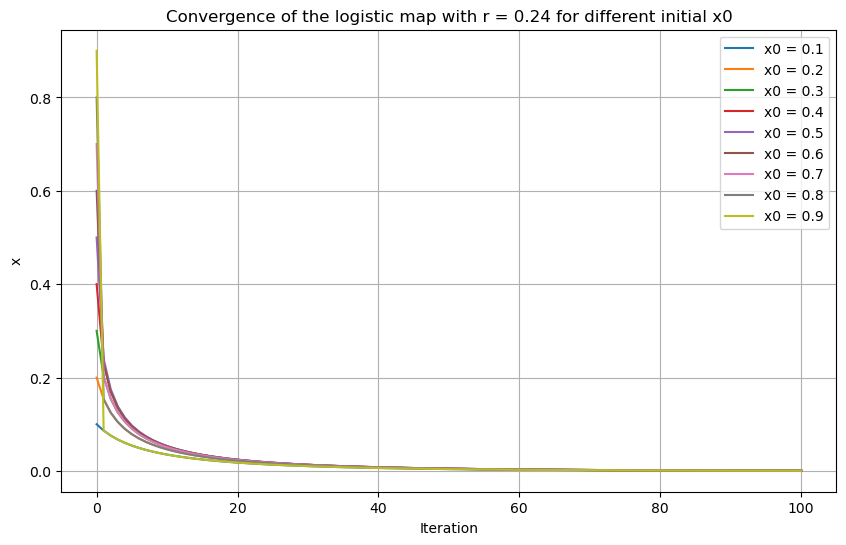

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Logistic map function
def logistic_map(x, r):
    return 4 * r * x * (1 - x)

# Parameters
r = 0.24
x0_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iterations = 100

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over different initial conditions
for x0 in x0_values:
    x_values = [x0]
    x = x0
    for _ in range(iterations):
        x = logistic_map(x, r)
        x_values.append(x)
    
    # Plot the values
    plt.plot(x_values, label=f'x0 = {x0}')

plt.title('Convergence of the logistic map with r = 0.24 for different initial x0')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

The x values for an r of 0.24 appear to converge at 0.

If x0 were to represent a population of insects, the qualitative result shows that they would go to extinction.

(b) Explore the dynamical behavior of (6.5) for r = 0.26, 0.5, 0.74, and 0.748. A fixed point is
unstable if for almost all values of x0 near the fixed point, the trajectories diverge from it.
Verify that x = 0 is an unstable fixed point for r > 0.25. Show that for the suggested values
of r, the iterated values of x do not change after an initial transient; that is, the long time
dynamical behavior is period 1. In Appendix 6A we show that for r < 3/4 and for x0 in the
interval 0 < x0 < 1, the trajectories approach the stable attractor at x = 1 − 1/4r. The set of
initial points that iterate to the attractor is called the basin of the attractor. For the logistic
map, the interval 0 < x < 1 is the basin of attraction of the attractor x = 1 − 1/4r.

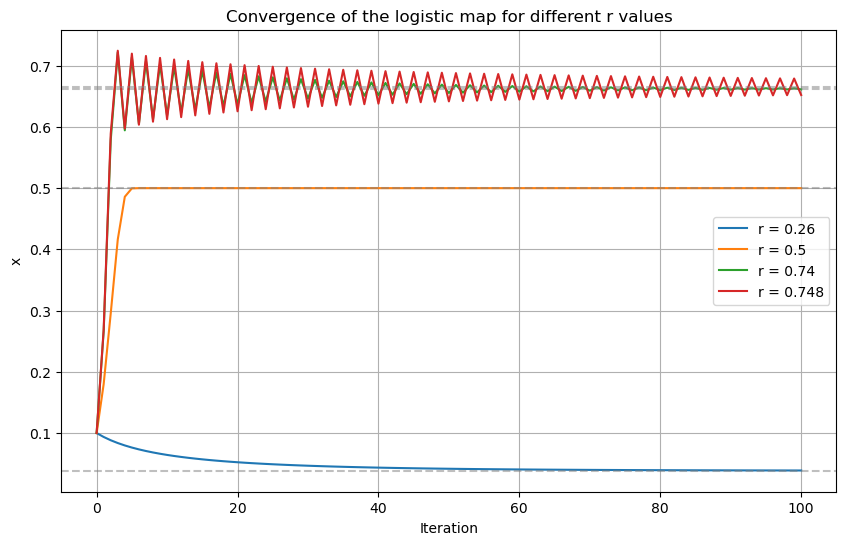

In [2]:
r_values = [0.26, 0.5, 0.74, 0.748]
x0 = 0.1
iterations = 100

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over different r values
for r in r_values:
    x_values = [x0]
    x = x0
    for _ in range(iterations):
        x = logistic_map(x, r)
        x_values.append(x)
    
    # Plot the values
    plt.plot(x_values, label=f'r = {r}')

    # Show the stable attractor
    plt.axhline(1 - 1/(4*r), color='gray', linestyle='--', alpha=0.5)

plt.title('Convergence of the logistic map for different r values')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

(c) Explore the dynamical properties of (6.5) for r = 0.752, 0.76, 0.8, and 0.862. For r = 0.752
and 0.862, approximately 1000 iterations are necessary to obtain convergent results. Show
that if r is greater than 0.75, x oscillates between two values after an initial transient behavior. That is, instead of a stable cycle of period 1 corresponding to one fixed point, the
system has a stable cycle of period 2. The value of r at which the single fixed point $x^∗$ splits
or bifurcates into two values $x_1^∗$ and $x_2^∗$ is $r = b_1 = 3/4$. The pair of x values, $x_1^∗$ and $x_2^∗$ ,
form a stable attractor of period 2.

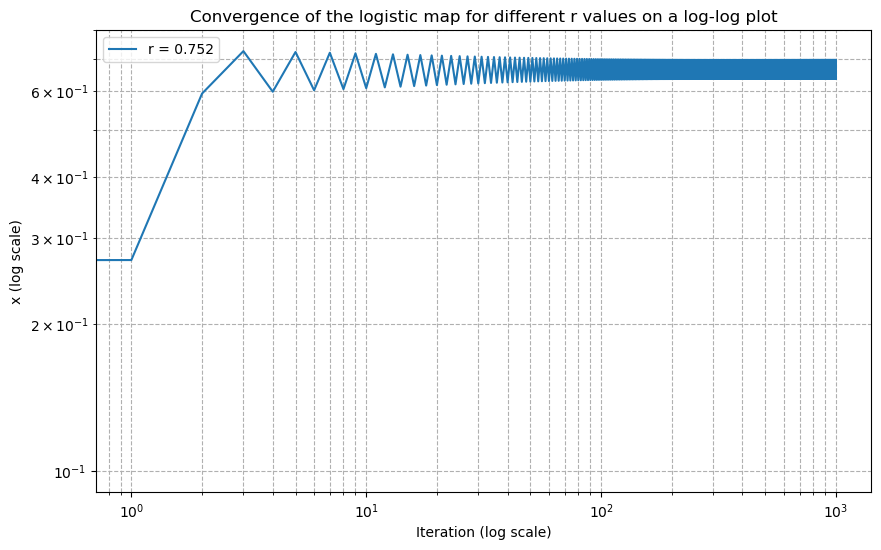

In [3]:
r_values = [0.752]#, 0.76, 0.8, 0.862]
x0 = 0.1
iterations = 1000

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over different r values
for r in r_values:
    x_values = [x0]
    x = x0
    for _ in range(iterations):
        x = logistic_map(x, r)
        x_values.append(x)
    
    # Plot the values using a log-log scale
    plt.loglog(range(iterations + 1), x_values, label=f'r = {r}')

plt.title('Convergence of the logistic map for different r values on a log-log plot')
plt.xlabel('Iteration (log scale)')
plt.ylabel('x (log scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

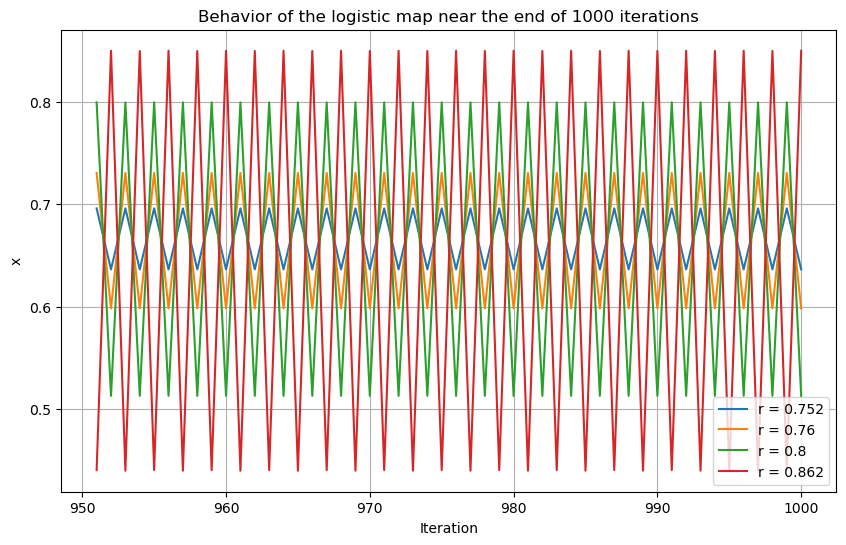

In [4]:
# Define the parameter values for detailed analysis
r_values_detailed = [0.752, 0.76, 0.8, 0.862]

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over the r values
for r in r_values_detailed:
    x_values = [x0]
    x = x0
    for _ in range(iterations):
        x = logistic_map(x, r)
        x_values.append(x)
    
    # Plot the last 50 iterations to observe the behavior after initial transient
    plt.plot(range(iterations - 49, iterations + 1), x_values[-50:], label=f'r = {r}')

plt.title('Behavior of the logistic map near the end of 1000 iterations')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

(d) What are the stable attractors of (6.5) for r = 0.863 and 0.88? What is the corresponding
period? What are the stable attractors and corresponding periods for r = 0.89, 0.891, and
0.8922?

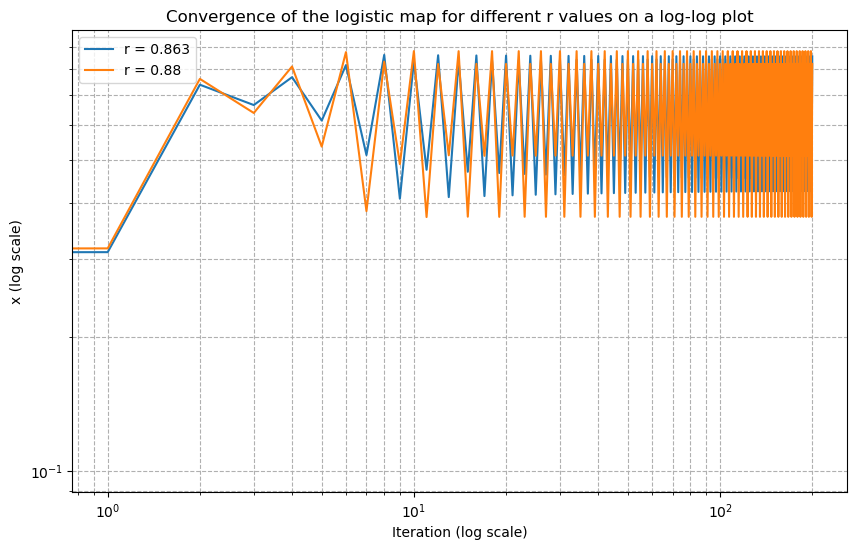

In [5]:
r_vals = [0.863, 0.88]
iterations = 200

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over the r values
for r in r_vals:
    x_values = [x0]
    x = x0
    for _ in range(iterations):
        x = logistic_map(x, r)
        x_values.append(x)
    
    # Plot the values using a log-log scale
    plt.loglog(range(iterations + 1), x_values, label=f'r = {r}')

plt.title('Convergence of the logistic map for different r values on a log-log plot')
plt.xlabel('Iteration (log scale)')
plt.ylabel('x (log scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### 2: Lorenz equations

The application of the Lorenz equations to weather prediction has led to a popular metaphor
known as the butterfly effect. This metaphor is made even more meaningful by inspection of Figure 6.10. 

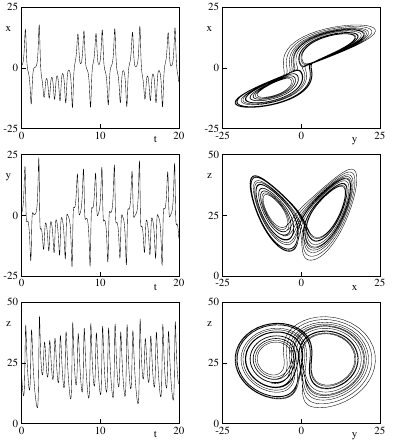

Figure 6.10: A trajectory of the Lorenz model with σ = 10, b = 8/3, and r = 28 and the initial
condition x0 = 1, y0 = 1, z0 = 20. A time interval of t = 20 is shown with points plotted at
intervals of 0.01. The fourth-order Runge–Kutta algorithm was used with ∆t = 0.0025.

Gould Problem 6.16 (you will need to read the preceding section). You may plot the solution however you wish (i.e. either in 3D using matplotlib’s 3D plotting capabilities or analogously to Fig. 6.10)

(a) Use a Runge–Kutta algorithm such as RK4 or RK45 (see Appendix 3A) to obtain a numerical solution of the Lorenz equations (6.33). Generate three-dimensional plots using Display3DFrame. Explore the basin of the attractor with σ = 10, b = 8/3, and r = 28.

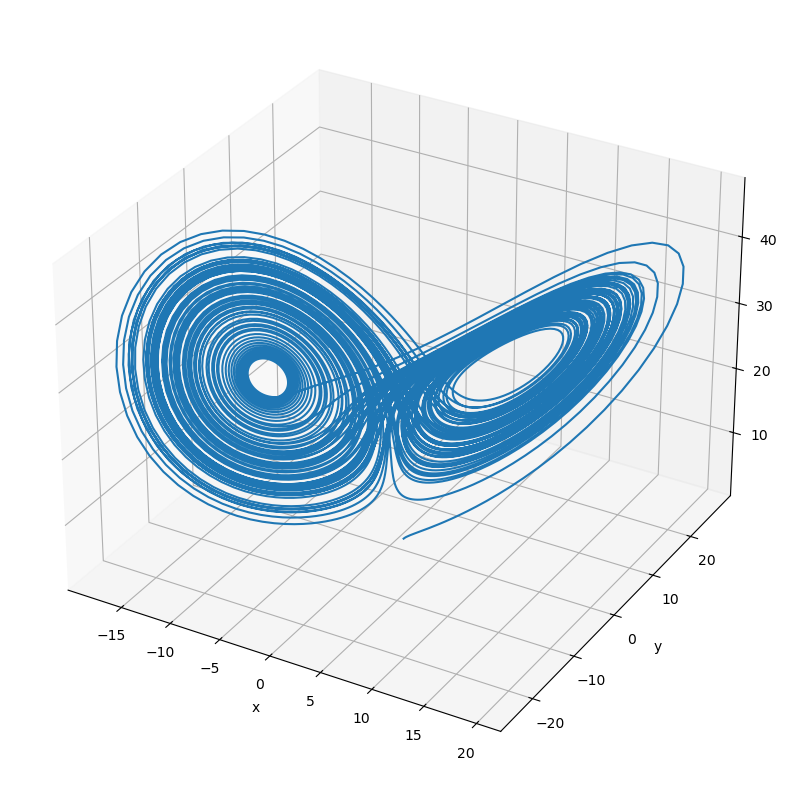

In [27]:
import numpy as np
import ode_methods as om

class Lorenz:
    def __init__(self,sigma=10.,beta=8./3.,r=28.):
        self.sigma = sigma
        self.beta = beta
        self.r = r
        
    def rhs(self,t,u):
        x = u[0]
        y = u[1]
        z = u[2]
        dxdt = -self.sigma*x + self.sigma*y
        dydt = -x*z + self.r*x - y
        dzdt = x*y - self.beta*z
        return np.array([dxdt,dydt,dzdt])
    
lorenz = Lorenz()
method = om.RungeKutta4()
integrator = om.Integrator(lorenz,method)
interval = [0.,100.]

u_0 = np.array([1.,1.,1.])
dt = 0.01
times,states = integrator.integrate(interval,dt,u_0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[:,0],states[:,1],states[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

(b) Determine qualitatively the sensitivity to initial conditions. Start two points very close to
each other and watch their trajectories for approximately $10^4$ time steps.

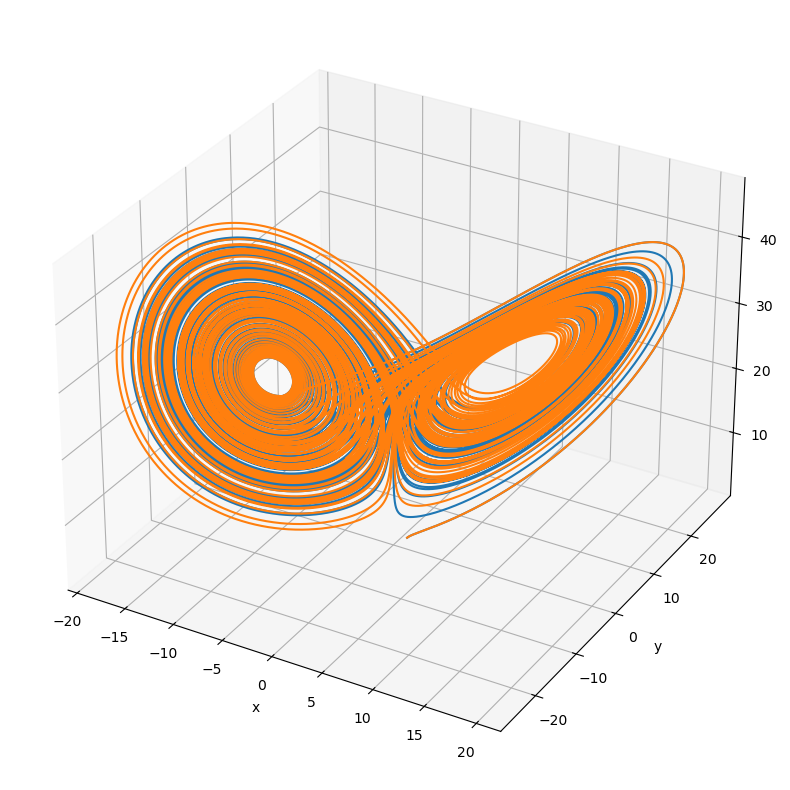

In [29]:
u_0 = np.array([1.,1.,1.])
u_1 = u_0 + 1.e-10
dt = 0.001
times,states_0 = integrator.integrate(interval,dt,u_0)
times,states_1 = integrator.integrate(interval,dt,u_1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(states_0[:,0],states_0[:,1],states_0[:,2])
ax.plot(states_1[:,0],states_1[:,1],states_1[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

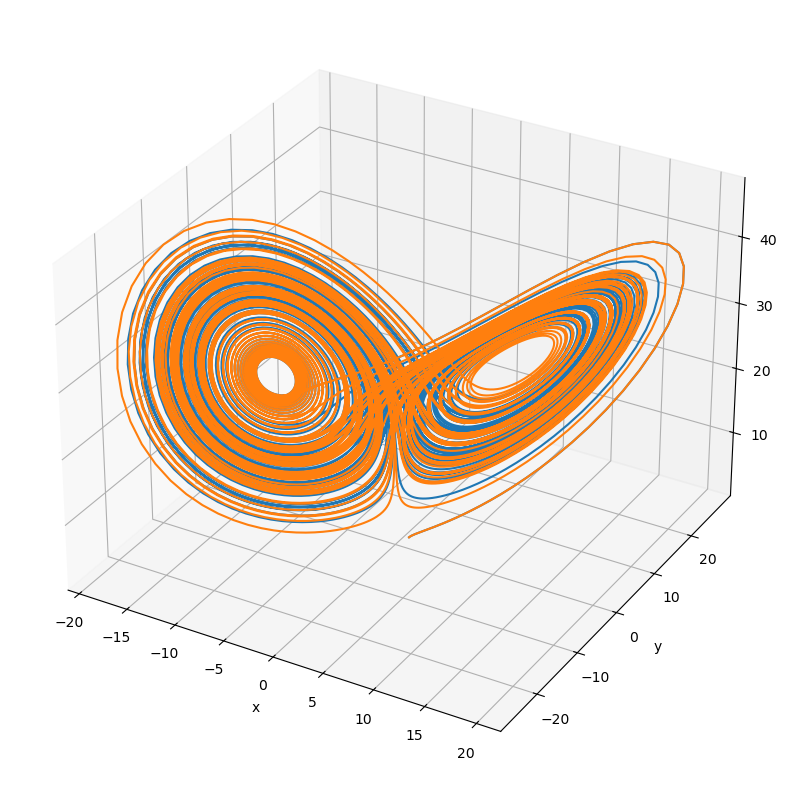

In [30]:
u_0 = np.array([1.,1.,1.])
u_1 = u_0 + 1.e-10
dt = 0.01
times,states_0 = integrator.integrate(interval,dt,u_0)
times,states_1 = integrator.integrate(interval,dt,u_1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(states_0[:,0],states_0[:,1],states_0[:,2])
ax.plot(states_1[:,0],states_1[:,1],states_1[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

(c) Let $z_m$ denote the value of z where z is a relative maximum for the mth time. You can
determine the value of $z_m$ by finding the average of the two values of z when the right-hand
side of (6.33) changes sign. Plot $z_{m+1}$ versus $z_m$ and describe what you find. This procedure
is one way that a continuous system can be mapped onto a discrete map. What is the slope
of the $z_{m+1}$ versus $z_m$ curve? Is its magnitude always greater than unity? If so, then this
behavior is an indication of chaos. Why?